In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import random
import os
import seaborn as sns

In [2]:
seed = 25
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

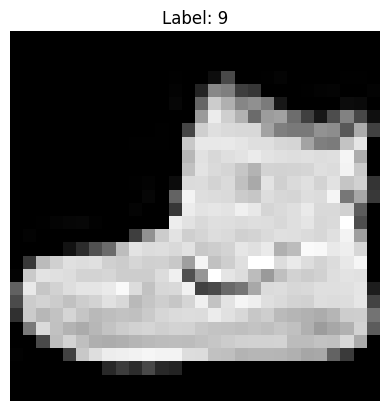

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [4]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input: (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.summary()

/Users/rohandas/Documents/GitHub/ML_Project/tfenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7327 - loss: 0.7557 - val_accuracy: 0.8680 - val_loss: 0.3520
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8625 - loss: 0.3792 - val_accuracy: 0.8887 - val_loss: 0.2971
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8809 - loss: 0.3257 - val_accuracy: 0.8992 - val_loss: 0.2750
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8929 - loss: 0.2901 - val_accuracy: 0.9020 - val_loss: 0.2631
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9004 - loss: 0.2685 - val_accuracy: 0.9052 - val_loss: 0.2573
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9097 - loss: 0.2446 - val_accuracy: 0.9093 - val_loss: 0.2410
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9152 - loss: 0.2257 - val_accuracy: 0.9130 - val_loss: 0.2382
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9188 - loss: 0

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9073 - loss: 0.2662
Test accuracy: 0.9062


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
📊 Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.88      0.92      0.90      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.72      0.72      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



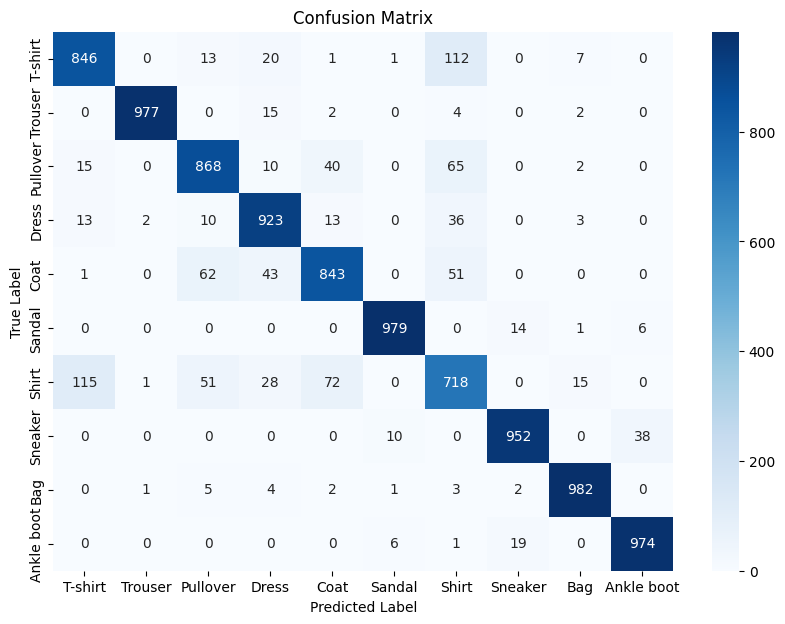

Accuracy for class 'T-shirt': 0.8460
Accuracy for class 'Trouser': 0.9770
Accuracy for class 'Pullover': 0.8680
Accuracy for class 'Dress': 0.9230
Accuracy for class 'Coat': 0.8430
Accuracy for class 'Sandal': 0.9790
Accuracy for class 'Shirt': 0.7180
Accuracy for class 'Sneaker': 0.9520
Accuracy for class 'Bag': 0.9820
Accuracy for class 'Ankle boot': 0.9740


In [8]:
# Predictions

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Per-Class Accuracy
correct = (y_test == y_pred_labels)
for digit in range(10):
    idx = (y_test == digit)
    acc = np.mean(correct[idx])
    print(f"Accuracy for class '{class_names[digit]}': {acc:.4f}")

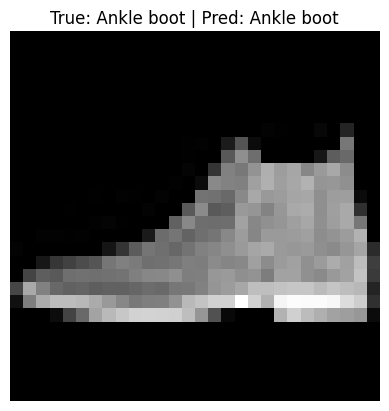

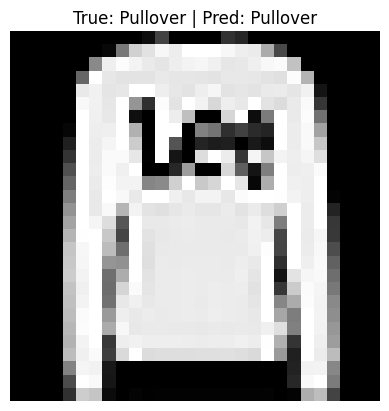

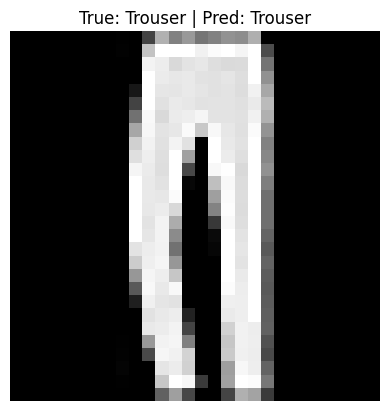

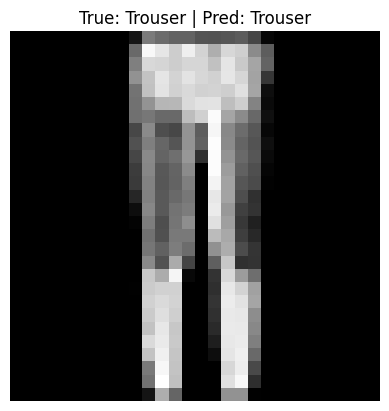

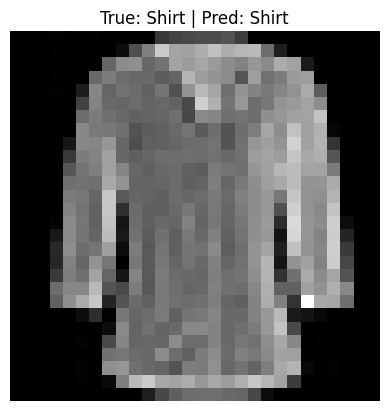

In [9]:
def plot_image(i):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]} | Pred: {class_names[np.argmax(y_pred[i])]}")
    plt.axis('off')

for i in range(5):
    plt.figure()
    plot_image(i)